# Option pricing problem

*Copyright (c) 2022 Institute for Quantum Computing, Baidu Inc. All Rights Reserved.*

The task of option pricing is to assess the expected value of the current stock option at the expiration date. Many factors determine the value of an option, including the current stock price, intrinsic value, time to maturity or time value, volatility, interest rates, and cash dividends paid. Many option pricing models use these factors as parameters to determine the fair market value of an option, the most widely known of which is the Black-Scholes model. The Black-Scholes model can price a variety of financial derivatives through a simple and analytically solvable model with a small number of input parameters. The model assumes that the prices of a large number of traded assets follow geometric Brownian motion with constant drift and volatility. When applied to stock options, the model contains a constant price change for the stock, the time value of the currency, the strike price of the option, and the time the option expires. In particular, instruments such as stocks or futures contracts will have a lognormally distributed price after a random walk, with constant drift and volatility. 

European option pricing is a direct application of the Black-Scholes model, which can be used to calculate the price of a European call option. Europeans call options give the option holder the right to purchase shares at a pre-agreed price of $K$ at $T$ on the expiration date. Typically, the option payoff function is given by
$$
f(S_{T})=\max\{0, S_{T}-K\}, \tag{1}
$$
where $S_{T}$ represents the asset price at the expiration date of the option and $K$ represents the strike price. Here, the asset price $S_{T}$ follows a known probability distribution under the Black-Scholes model and depends on the initial price, risk-free interest rate, volatility, and maturity date $T$. In classical calculations, the expected value of an option's stock at maturity can be calculated by Monte Carlo methods: a market sample is taken from a known (risk-neutral) probability distribution, and then the asset price given that market sample is calculated. Afterwards, the payoff of the option for a given asset price is calculated, and finally, averaging payoffs overall multiple samples gives an approximation of the option price.

## Quantum solutions
Unlike classical algorithms, the core of the quantum Monte Carlo method is to simulate probability distributions with quantum circuits and store asset prices in quantum states, and then calculate the average of returns in parallel through quantum amplitude estimation algorithms. Through the characteristics of quantum superposition and entanglement, quantum schemes have the advantage of quadratic acceleration compared with classical schemes. Next, we take a European call option as an example to show how to use Paddle Quantum to simulate this quantum scheme to complete the risk-neutral pricing problem of European call options.

### Online demonstration

We have set a parameter that can be used directly for the pricing of European call options. Just configure it in the configuration file `config.toml` and enter the command 
`python euro_pricing.py --config config.toml`
The configured European options can be priced.

Here, we give a version of the online demo that can be tested online. First define the contents of the configuration file:

In [1]:
euro_toml = r"""
# The overall profile used to calculate the option pricing model
# initial price
initial_price = 100
# strike price
strike_price = 110
# risk-free rate
interest_rate = 0.05
# Market volatility
volatility = 0.1
# Option expiration date (in years)
maturity_date = 1
# Estimation accuracy index
degree_of_estimation = 5
"""

The financial module of the Paddle Quantum enables numerical simulation of quantum Monte Carlo schemes. We can import ``EuroOptionEstimator`` from the ``paddle_quantum.finance`` module to solve the configured option pricing problem.

The risk-neutral price of the option is approximately  2.2613329887390137
The following is a circuit implementation diagram of this quantum scheme.


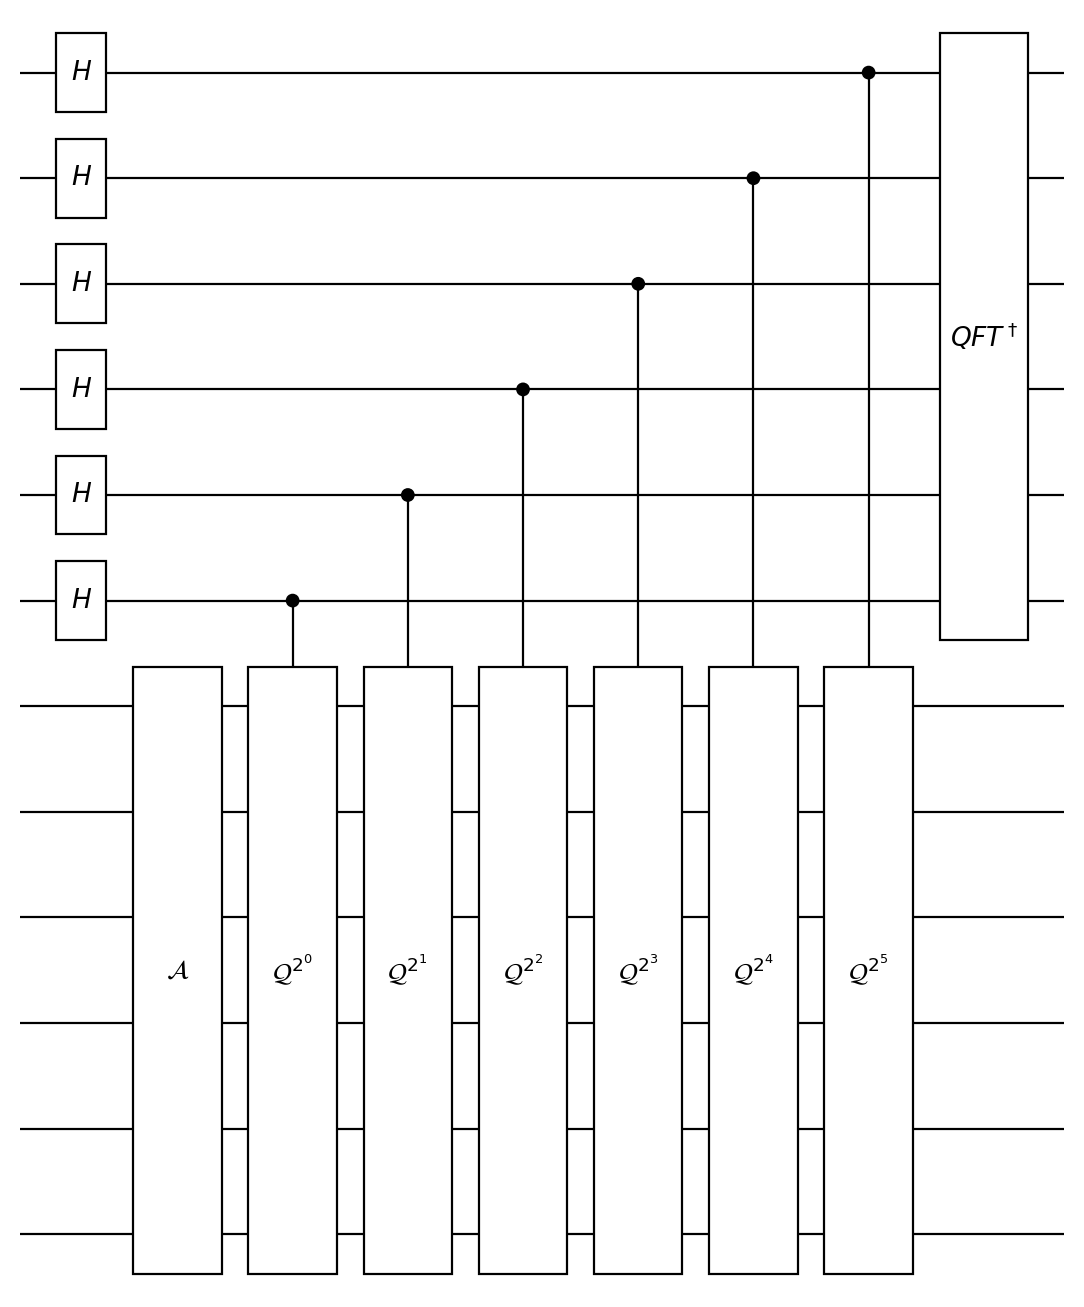

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

import toml
from paddle_quantum.finance import EuroOptionEstimator

config = toml.loads(euro_toml)
initial_price = config["initial_price"]
strike_price = config["strike_price"]
interest_rate = config["interest_rate"]
volatility = config["volatility"]
maturity_date = config["maturity_date"]
degree_of_estimation = config["degree_of_estimation"]


estimator = EuroOptionEstimator(initial_price, strike_price, interest_rate, volatility, maturity_date, degree_of_estimation)
print("The risk-neutral price of the option is approximately ", estimator.estimate())
print("The following is a circuit implementation diagram of this quantum scheme.")
estimator.plot()

By modifying the contents of the configuration file and running the prediction code, you can test the model online.

___

# Note

The models presented here are only intended to solve the option pricing problem of the Black-Scholes model.

# Citation

```
@article{rebentrost2018quantum,
  title = {Quantum Computational Finance: {{Monte Carlo}} Pricing of Financial Derivatives},
  shorttitle = {Quantum Computational Finance},
  author = {Rebentrost, Patrick and Gupt, Brajesh and Bromley, Thomas R.},
  year = {2018},
  month = aug,
  journal = {Physical Review A},
  volume = {98},
  number = {2},
  pages = {022321},
  publisher = {{American Physical Society}},
  doi = {10.1103/PhysRevA.98.022321},
  url = {https://link.aps.org/doi/10.1103/PhysRevA.98.022321},
}
```

# References

[1] Rebentrost, Patrick, Brajesh Gupt, and Thomas R. Bromley. "Quantum computational finance: Monte Carlo pricing of financial derivatives." Physical Review A 98.2 (2018): 022321.